In [7]:
import pandas as pd
import numpy as np
from tsfit.tskew import tskew_pdf
from tsfit.tskew import tskew_cdf
from tsfit.tskew import tskew_ppf
from tsfit.tskew import tskew_mean
from tsfit.asymt import asymt_pdf
from tsfit.asymt import asymt_cdf
from tsfit.asymt import asymt_ppf
from tsfit.asymt import asymt_mean
from tsfit.tskewfit import tskew_fit
from tsfit.asymtfit import asymt_fit
import matplotlib.pyplot as plt  
from matplotlib.ticker import FormatStrFormatter

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from matplotlib.ticker import FormatStrFormatter

In [66]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def gen_skewt(fitdate,fitparam,cond_quant,horizon,freq,olsmean):
    
    
    if fitparam['fittype']=='T-skew':
        loc=0
    
        if fitparam['mode']['constraint']=='Fixed':
            loc=fitparam['mode']['value']
        else:
            loc=cond_quant [0.5]
    
        tsfit=tskew_fit(cond_quant,fitparam)
    
        if fitparam['mode']['constraint']=='Free':
            loc=tsfit['loc']
            
        v_q5=tskew_ppf(0.05, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        v_q40=tskew_ppf(0.4, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        v_q60=tskew_ppf(0.6, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        v_q95=tskew_ppf(0.95, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        x_inc=(v_q40-v_q5)/4
        min_v = v_q5-abs(v_q5-v_q40)
        max_v = v_q95+abs(v_q95-v_q60)
        while tskew_cdf(min_v+1, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])>0.05:
            min_v-=1

        print(loc,min_v,max_v)
        print(tsfit)
        x_list = [x for x in np.arange(min_v,max_v,0.05)]
        yvals= [tskew_pdf(z, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']) for z in x_list]    
        ycdf = [tskew_cdf(z, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']) for z in x_list]
        yzero=tskew_cdf(0, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        print (tskew_ppf(0.5, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']))
        print (tskew_cdf(tskew_ppf(0.5, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']),df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']))
        tmp_dic={'Tskew_PDF_x':x_list,'Tskew_PDF_y':yvals,'Tskew_CDF':ycdf}
        dfpdf=pd.DataFrame(tmp_dic)
        for i,y in enumerate(ycdf):
            q5loc=i
            if y>0.05:               
                break
        for i,y in enumerate(ycdf):
            q10loc=i
            if y>0.1:
                break  
        for i,x in enumerate(x_list):
            zerog=i
            if x<=0 and (i==len(x_list)-1 or x_list[i+1]>0):                
                break
        print(q5loc,q10loc)   
        
        xq5=tskew_ppf(0.05, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']) 
        xq10=tskew_ppf(0.1, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']) 
        yq5= tskew_pdf(xq5, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']) 
        yq10= tskew_pdf(xq10, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])     
        ycq5= tskew_cdf(xq5, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew']) 
        ycq10= tskew_cdf(xq10, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        
        
        
        meanx=tskew_mean(df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        titlestr = freq+" T-skew quantile fit for "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        lablestr = "Density "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        fig, ax = plt.subplots(1, 1, figsize=(20,10))
        ax.set_ylim(0, 1.2 * max(yvals))
        ax.set_title(titlestr,fontsize=24)
        ax.fill_between(x_list[:q5loc], 0, yvals[:q5loc],  facecolor='red', interpolate=True)
        ax.plot(x_list,yvals,'b-',label=lablestr)

        modx=tsfit['loc']
        mody=tskew_pdf(loc, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        
        medx=tskew_ppf(0.5, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        medy=tskew_pdf(medx, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        meany=tskew_pdf(meanx, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        
        if fitparam['plot_mode']:
            ax.plot([modx,modx],[0,mody],'r-.')
            ax.annotate('Mode', xy=(modx, mody),xycoords='data',
                        xytext=(modx+x_inc, mody*1.2), textcoords='data',
                        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"),fontsize=24,)
        if fitparam['plot_median']:
            ax.plot([medx,medx],[0,medy],'m-.')
            if medx<modx:
                sp=-x_inc
            else:
                sp=x_inc
            ax.annotate('Median', xy=(medx, medy),xycoords='data',
                        xytext=(medx+sp, mody*1.1), textcoords='data',
                        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"),fontsize=24,)
        if fitparam['plot_mean']:
            if meanx<modx:
                sp=-x_inc
            else:
                sp=x_inc
            ax.plot([meanx,meanx],[0,meany],'c-.')
            ax.annotate('Mean', xy=(meanx, meany),xycoords='data',
                        xytext=(meanx+sp, meany*1.1), textcoords='data',
                        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"),fontsize=24,)
            
        ax.plot([xq5,xq5],[0,yq5],'k--')
        
        ax.annotate('GaR 5%', xy=(xq5, yq5), xycoords='data',
                    xytext=(xq5-x_inc, yq5*1.4), textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="angle3,angleA=90,angleB=0"),fontsize=24,)
        ax.plot([xq10,xq10],[0,yq10],'k--')
        ax.annotate('GaR 10%', xy=(xq10, yq10), xycoords='data',
                    xytext=(xq10-x_inc, yq10*1.3), textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle3,angleA=0,angleB=90"),fontsize=24,)
        ax.legend(fontsize=24)
        ax.tick_params(labelsize=24)
        plt.ylim(0, max(yvals)*1.4)
        plt.xlim(x_list[0],x_list[-1])
        
        plt.ylabel('Probability Density', fontsize=24)
        plt.xlabel(freq+' GDP(compound annual growth rate)', fontsize=24)
        
        fig2, ax2 = plt.subplots(1, 1, figsize=(20,10))
        titlestr = freq+" T-skew quantile fit for "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        lablestr = "Cumulative probability "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        ax2.fill_between(x_list[:q5loc+1], 0, ycdf[:q5loc+1],  facecolor='red', interpolate=True)
        ax2.plot([xq5,xq5],[0,ycq5],'k--')
        ax2.plot([xq10,xq10],[0,ycq10],'k--')
        ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        modcy=tskew_cdf(modx, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        medcy=tskew_cdf(medx, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        meancy=tskew_cdf(meanx, df=tsfit['df'], loc=tsfit['loc'], scale=tsfit['scale'], skew=tsfit['skew'])
        
        if fitparam['plot_mode']:
            ax2.plot([modx,modx],[0,modcy],'r-.')
            ax2.plot([x_list[0],modx],[modcy,modcy],'r-.')
            
        if fitparam['plot_median']:
            ax2.plot([medx,medx],[0,medcy],'m-.')
            ax2.plot([x_list[0],medx],[medcy,medcy],'m-.')
#            ax.annotate('Median', xy=(medx, medy),xycoords='data',
#                        xytext=(min(medx*(1+0.05*sp),medx+0.2*sp), medy*1.1), textcoords='data',
#                        arrowprops=dict(arrowstyle="->",
#                        connectionstyle="arc3"),fontsize=24,)
        if fitparam['plot_mean']:

            ax2.plot([meanx,meanx],[0,meancy],'c-.')
            ax2.plot([x_list[0],meanx],[meancy,meancy],'c-.')
        
        ax2.set_ylim(0, 1)
        ax2.set_title(titlestr,fontsize=24)        
        ax2.plot(x_list,ycdf,'b-',label=lablestr)
        ax2.legend(fontsize=24,loc=2)
        ax2.tick_params(labelsize=24)
        plt.ylim(0, 1)
        plt.xlim(x_list[0],x_list[-1])
        plt.ylabel('Cumulative Probability', fontsize=24)
        plt.xlabel(freq+' GDP(compound annual growth rate)', fontsize=24)
    # sht=wb.sheets['T-skew_fit']
    # sht.pictures.add(fig, name='MyPlot', update=False, left=sht.range('B7').left, top=sht.range('B7').top, height=260, width=520)
        res=[]    
        res.append(['Date of input',fitdate])
        res.append(['Horizon forward',horizon])
        res.append(['Conditional mode',float("{:.4f}".format(loc))])
        res.append(['Conditional median',float("{:.4f}".format(medx))])
        res.append(['Conditional mean',float("{:.4f}".format(meanx))])
        res.append(['GaR5%',float("{:.4f}".format(xq5))])
        res.append(['GaR10%',float("{:.4f}".format(xq10))])
        res.append(['Growth below 0 probablity',float("{:.4f}".format(yzero))])
        res.append(['Skewness',tsfit['skew']])
        res.append(['Scale',tsfit['scale']])

        
    # Add return values
        if fitparam['qsmooth']['option']=='None':
            cqlist=[['Tau','Cond_quant']]
        else:
            cqlist=[['Tau','Cond_quant_smoothed']]    
        
        qlist=list(cond_quant.keys())
        qlist.sort()
        for q in qlist:
            cqlist.append([q,cond_quant[q]])
        
        plt.close('all')
        return res,cqlist,fig,fig2,dfpdf
    
    
    elif fitparam['fittype']=='Asymmetric T':
        loc=0
    
        if fitparam['mode']['constraint']=='Fixed':
            loc=fitparam['mode']['value']
        else:
            loc=cond_quant [0.5]
    
        asymtfit=asymt_fit(cond_quant,fitparam,olsmean)
        #asymt_ppf(p, alpha=0.5, nu1=1, nu2=1, mu=0, sigma=1):
        print(asymtfit)
        loc=asymtfit['loc']
        min_v = loc-1
        max_v = loc+1
        while asymt_cdf(min_v+0.2, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale'])>0.05:
            min_v-=0.2
        print(loc,min_v,max_v)
        print(asymtfit)
        x_list = [x for x in np.arange(min_v,max_v,0.02)]
        yvals= [asymt_pdf(z, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) for z in x_list]    
        ycdf = [asymt_cdf(z, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) for z in x_list]
        print (asymt_ppf(0.5, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']))
        
        meanx=asymt_mean(alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale'])
        
        tmp_dic={'AsymT_PDF_x':x_list,'AsymT_PDF_y':yvals,'AsymT_CDF':ycdf}
        dfpdf=pd.DataFrame(tmp_dic)
        for i,y in enumerate(ycdf):
            if y>0.05:
                q5loc=i
                break
        for i,y in enumerate(ycdf):
            if y>0.1:
                q10loc=i
                break  
        for i,x in enumerate(x_list):
            if x<=0 and (i==len(x_list)-1 or x_list[i+1]>0):
                zerog=i
                break

        #print(q5loc,q10loc)   
        xq5 = asymt_ppf(0.05, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        xq10 = asymt_ppf(0.1, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale'])     
        yq5= asymt_pdf(xq5, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        yq10= asymt_pdf(xq10,alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        ycq5= asymt_cdf(xq5, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        ycq10= asymt_cdf(xq10,alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        yzero=asymt_cdf(0,alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 

        
        titlestr = freq+" Asymmetric T quantile fit for "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        lablestr = "Density "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        fig, ax = plt.subplots(1, 1, figsize=(20,10))
        ax.set_ylim(0, 1.2 * max(yvals))
        ax.set_title(titlestr,fontsize=24)
        ax.fill_between(x_list[:q5loc+1], 0, yvals[:q5loc+1],  facecolor='red', interpolate=True)
        ax.plot(x_list,yvals,'b-',label=lablestr)
        
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        modx=loc
        mody=asymt_pdf(loc,alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        
        medx=asymt_ppf(0.5, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        medy=asymt_pdf(medx, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale'])        
        meany=asymt_pdf(meanx, alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale'])
        
        if fitparam['plot_mode']:
            ax.plot([modx,modx],[0,mody],'r-.')
            ax.annotate('Mode', xy=(modx, mody),xycoords='data',
                        xytext=(min(modx*1.05,modx+0.2), mody*1.2), textcoords='data',
                        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"),fontsize=24,)
            
        if fitparam['plot_median']:
            if medx<modx:
                sp=-1
            else:
                sp=1
            ax.plot([medx,medx],[0,medy],'m-.')
            ax.annotate('Median', xy=(medx, medy),xycoords='data',
                        xytext=(min(medx*(1+0.05*sp),medx+0.2*sp), medy*1.1), textcoords='data',
                        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"),fontsize=24,)
        if fitparam['plot_mean']:
            if meanx<modx:
                sp=-1
            else:
                sp=1
            ax.plot([meanx,meanx],[0,meany],'c-.')
            ax.annotate('Mean', xy=(meanx, meany),xycoords='data',
                        xytext=(min(meanx*(1+0.05*sp),meanx+0.2*sp), meany*1.1), textcoords='data',
                        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"),fontsize=24,)
            
        ax.plot([xq5,xq5],[0,yq5],'k--')

        ax.annotate('GaR 5%', xy=(x_list[q5loc-1], yq5), xycoords='data',
                    xytext=(x_list[q5loc-1]*0.9, (yq5+mody)/3), textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="angle3,angleA=90,angleB=0"),fontsize=24,)
        ax.plot([xq10,xq10],[0,yq10],'k--')
        ax.annotate('GaR 10%', xy=(x_list[q10loc-1], yq10), xycoords='data',
                    xytext=(x_list[q10loc-1]*0.9, (yq10+mody)/2), textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle3,angleA=0,angleB=90"),fontsize=24,)
        ax.legend(fontsize=24)
        ax.tick_params(labelsize=24)
        plt.ylim(0, max(yvals)*1.4)
        plt.xlim(x_list[0],x_list[-1])
        plt.ylabel('Probability Density', fontsize=24)
        plt.xlabel(freq+' GDP(compound annual growth rate)', fontsize=24)
    # sht=wb.sheets['T-skew_fit']
    # sht.pictures.add(fig, name='MyPlot', update=False, left=sht.range('B7').left, top=sht.range('B7').top, height=260, width=520)
        
    
        fig2, ax2 = plt.subplots(1, 1, figsize=(20,10))
        titlestr = freq+" Asymmetric T quantile fit for "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        lablestr = "Cumulative probability "+fitdate.strftime('%m/%d/%Y')+" "+"growth rate"+" forward "+str(horizon)
        
        ax2.set_ylim(0, 1)
        ax2.set_title(titlestr,fontsize=24)        
        ax2.plot(x_list,ycdf,'b-',label=lablestr)
        ax2.fill_between(x_list[:q5loc], 0, ycdf[:q5loc],  facecolor='red', interpolate=True)
        ax2.plot([xq5,xq5],[0,ycq5],'k--')
        ax2.plot([xq10,xq10],[0,ycq10],'k--')
        ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        modcy=asymt_cdf(modx,alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        medcy=asymt_cdf(medx,alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        meancy=asymt_cdf(meanx,alpha=asymtfit['skew'], nu1=asymtfit['kleft'], nu2=asymtfit['kright'], mu=asymtfit['loc'], sigma=asymtfit['scale']) 
        if fitparam['plot_mode']:
            ax2.plot([modx,modx],[0,modcy],'r-.')
            ax2.plot([x_list[0],modx],[modcy,modcy],'r-.')
            
        if fitparam['plot_median']:
            ax2.plot([medx,medx],[0,medcy],'m-.')
            ax2.plot([x_list[0],medx],[medcy,medcy],'m-.')
#            ax.annotate('Median', xy=(medx, medy),xycoords='data',
#                        xytext=(min(medx*(1+0.05*sp),medx+0.2*sp), medy*1.1), textcoords='data',
#                        arrowprops=dict(arrowstyle="->",
#                        connectionstyle="arc3"),fontsize=24,)
        if fitparam['plot_mean']:

            ax2.plot([meanx,meanx],[0,meancy],'c-.')
            ax2.plot([x_list[0],meanx],[meancy,meancy],'c-.')
        
        
        ax2.legend(fontsize=24,loc=2)
        ax2.tick_params(labelsize=24)
        plt.ylim(0,1)
        plt.xlim(x_list[0],x_list[-1])
        plt.ylabel('Cumulative Probability', fontsize=24)
        plt.xlabel(freq+' GDP(compound annual growth rate)', fontsize=24)
        
        res=[]    
        res.append(['Date of input',fitdate])
        res.append(['Horizon forward',horizon])
        res.append(['Conditional mode',float("{:.4f}".format(loc))])
        res.append(['Conditional median',float("{:.4f}".format(medx))])
        res.append(['Conditional mean',float("{:.4f}".format(meanx))])
        res.append(['GaR5%',float("{:.4f}".format(xq5))])
        res.append(['GaR10%',float("{:.4f}".format(xq10))])
        res.append(['Growth below 0 probablity',float("{:.4f}".format(yzero))])
        res.append(['Left kurtosis',asymtfit['kleft']])
        res.append(['Right kurtosis',asymtfit['kright']])        
        res.append(['Skew parameter',asymtfit['skew']])
        res.append(['Scale',asymtfit['scale']])

        
    # Add return values
        if fitparam['qsmooth']['option']=='None':
            cqlist=[['Tau','Cond_quant']]
        else:
            cqlist=[['Tau','Cond_quant_smoothed']]    
        
        qlist=list(cond_quant.keys())
        qlist.sort()
        for q in qlist:
            cqlist.append([q,cond_quant[q]])
        
        plt.close('all')
        return res,cqlist,fig,fig2,dfpdf

In [133]:
df = pd.read_csv(r'C:\Users\jadfa\OneDrive\Documents\GitHub\GaR-1\GAR\quantfit\Data\contquantdf.csv')
df.set_index('Date', inplace=True)
quantile2018df = df[df.index == '2018-08-31']
quantile2018 = quantile2018df[quantile2018df['tau'] != 'mean']
quantile2018['tau'] = pd.to_numeric(quantile2018['tau'], errors='coerce')
quantile2018_dict = dict(zip(quantile2018['tau'], quantile2018['conditional_quantile_mean']))
quantile2018_dict

C:\Users\jadfa\AppData\Local\Temp\ipykernel_14888\1218318748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile2018['tau'] = pd.to_numeric(quantile2018['tau'], errors='coerce')


{0.05: -2.226341932166533,
 0.1: -1.9929853745630903,
 0.25: -0.9284870869263852,
 0.5: -0.3065942412917537,
 0.75: 0.4681537221243375,
 0.9: 0.786400182250426}

In [134]:
mean_row2018 = quantile2018df[quantile2018df['tau'] == 'mean']

In [135]:
olsmean = mean_row2018['conditional_quantile_mean']

In [136]:
# Input parameters
fitdate = datetime.datetime(2018, 11, 30)
fitparam = {
    'fittype': 'T-skew',
    'mode': {'constraint': 'Free'},  # You can customize these parameters
    'skew_low': {'constraint': 'Free'},
    'skew_high': {'constraint': 'Free'},
    'plot_mode': True,
    'plot_median': False,
    'plot_mean': False,
    'qsmooth': {'option': 'None'},  # You can specify smoothing options
    'df_constraint': {'Constraint': 'Free'},  # You can specify the degree of freedom constraint
    'plot_pdf': True,
    'plot_cdf': True,
    'var_low': {'constraint': 'Free'},
    'var_high': {'constraint': 'Free'},
        'dof': {
        'constraint': 'Free',  # Add the 'dof' key with constraint and value
          # Adjust the degrees of freedom value as needed
    },
    
}
cond_quant = quantile2018_dict
horizon = 12
freq = 'Monthly'
olsmean = mean_row2018['conditional_quantile_mean']

In [137]:
# Call the gen_skewt function
results, cqlist, fig, fig2, dfpdf = gen_skewt(fitdate, fitparam, cond_quant, horizon, freq, olsmean)

# Display the generated distribution function plot
plt.show()

# Print some of the results for reference
for item in results:
    print(item)

-0.2812 -4.357153136110631 3.326527679779546
{'loc': -0.2812, 'df': 2, 'scale': 0.6909, 'skew': 0.9573}
-0.3238890937550589
0.5000000000118104
39 54
['Date of input', datetime.datetime(2018, 11, 30, 0, 0)]
['Horizon forward', 12]
['Conditional mode', -0.2812]
['Conditional median', -0.3239]
['Conditional mean', -0.3665]
['GaR5%', -2.4417]
['GaR10%', -1.6827]
['Growth below 0 probablity', 0.6595]
['Skewness', 0.9573]
['Scale', 0.6909]


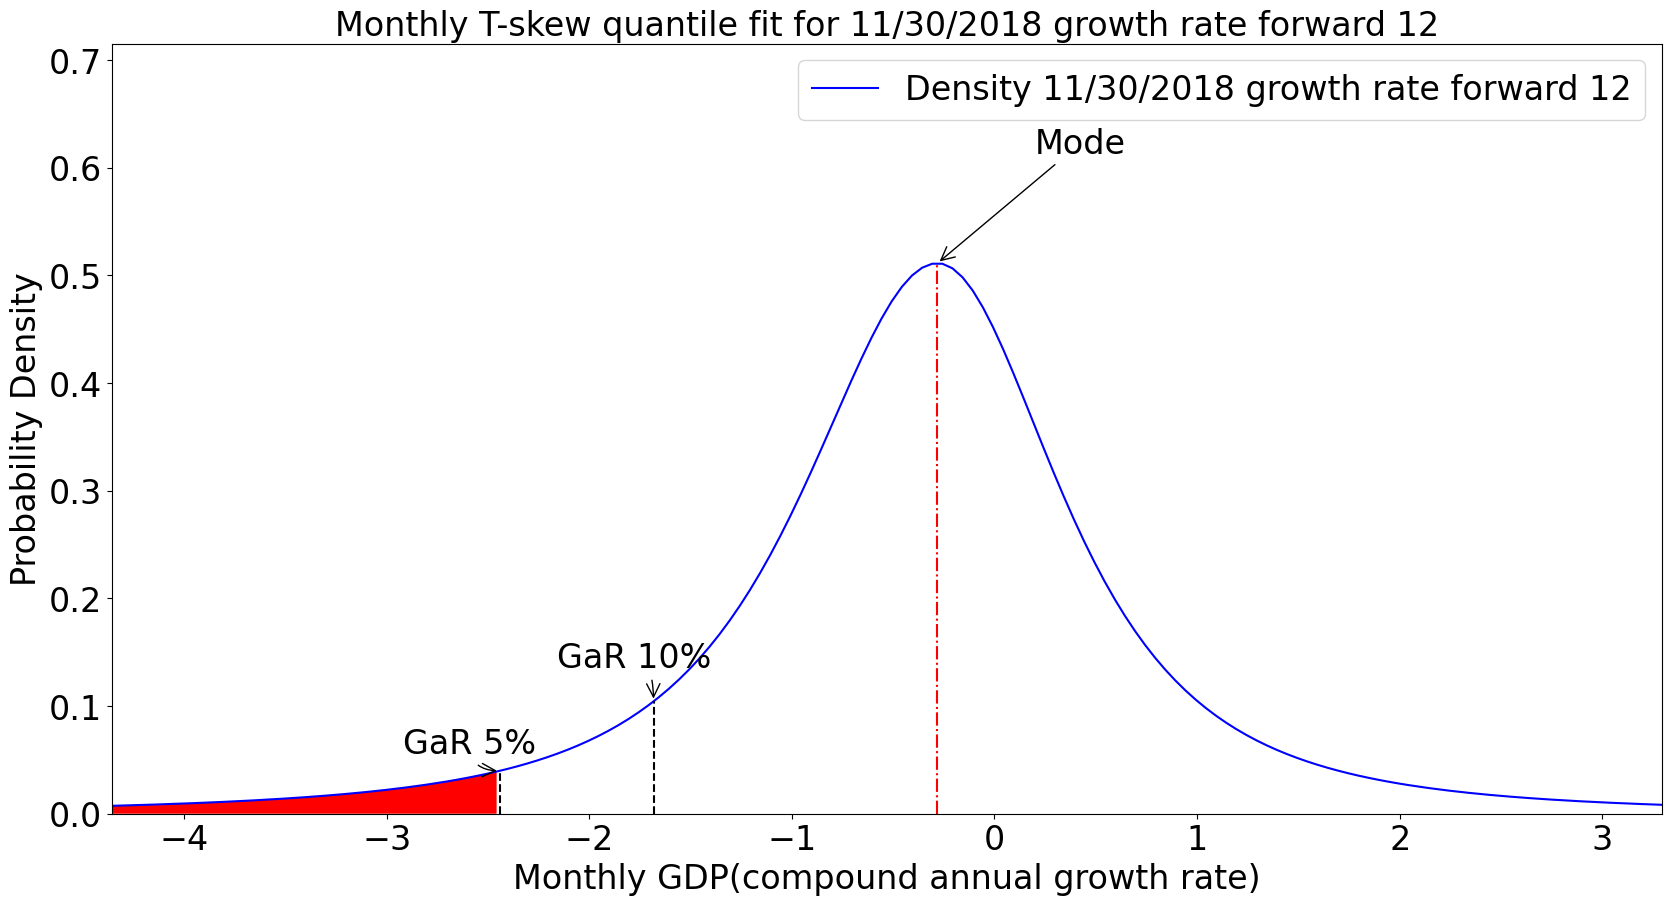

In [138]:
fig

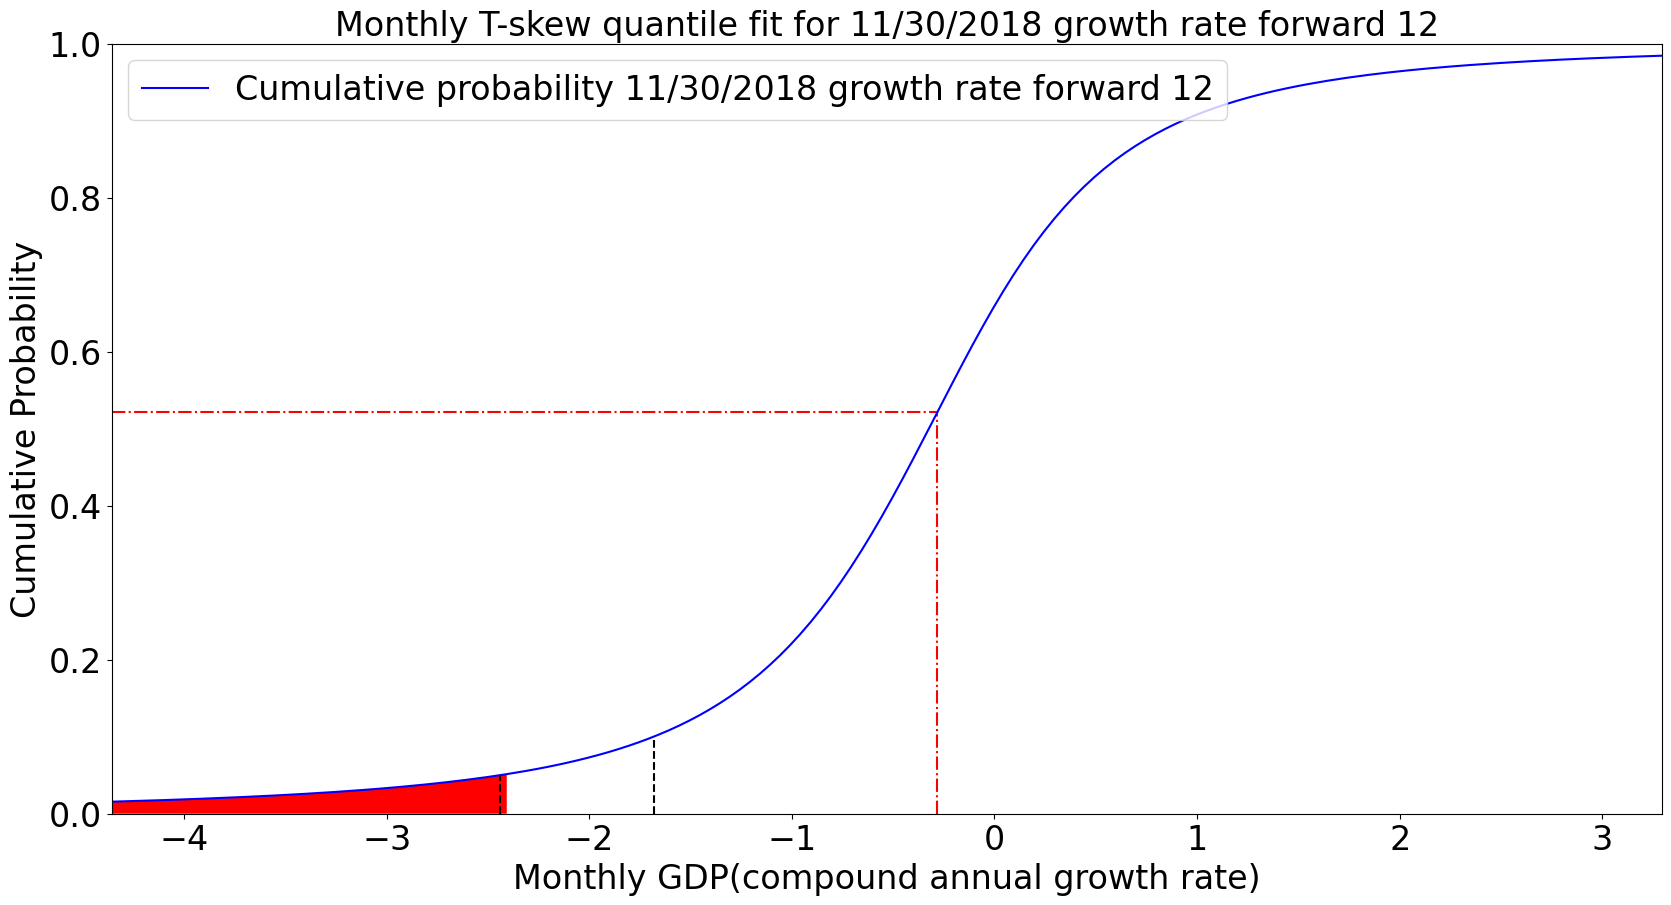

In [139]:
fig2